# Checking M31 17B Data (11/08/2017)

Up to now (11/08/2017), all observations has been executed in 17B (total 25 hours).

This note is used to check weather our 17A and 17B observations towards M31 is deep enough for our scientific goals.

# 450 um Band

Plot 450 um image, which includes all our 17A and 17B observations.

Using DS9, we could measure a rms noise of ~0.159 mJy/arcsec**2 from the image center. 
Considering an angule resolution of 8", our 450 um image's rms is ~11.5 mJy/beam, which is not far from our garget sensitivity (~9 mJy/beam).

In [1]:
import matplotlib
from astropy import units as u
matplotlib.use('Agg')
import aplpy
%matplotlib inline

/Users/shjiao/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: The mpl_toolkits.axes_grid module was deprecated in version 2.1. Use mpl_toolkits.axes_grid1 and mpl_toolkits.axisartist provies the same functionality instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


INFO: Setting slices=[0] [aplpy.core]
INFO: Auto-setting vmin to -4.055e+01 [aplpy.core]
INFO: Auto-setting vmax to  4.013e+01 [aplpy.core]


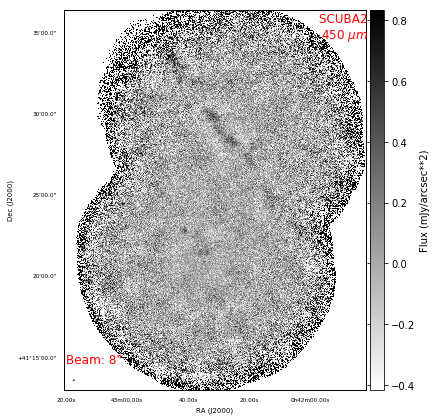

In [13]:
f_450 = aplpy.FITSFigure('/Users/shjiao/desktop/check/m31_450um/m31_450_final.fits', figsize=(7,7))
f_450.show_grayscale()
f_450.add_colorbar()
f_450.colorbar.show()
f_450.recenter(10.6303042,41.41090276,width=0.31,height=0.39)
f_450.colorbar.set_location('right')
f_450.colorbar.set_axis_label_text('Flux (mJy/arcsec**2)')
f_450.add_label(0.93,0.95, 'SCUBA2 \n450 $\mu m$ ', color='red', relative=True, size='large',layer='source')
f_450.show_colorscale(vmin=-30/72.,vmax=60/72.,cmap='gist_yarg',stretch='linear')
f_450.add_beam(major=8.*u.arcsecond,minor=8.*u.arcsecond,angle=0.0)
f_450.add_label(0.1, 0.08, 'Beam: 8\"', relative=True, size='large', layer='title',color='red')
f_450.tick_labels.set_font(size='xx-small')
f_450.axis_labels.set_font(size='x-small')

Smooth the SCUBA2 450 um image to the resolution of SCUBA2 850 um image (from 8" to 14").
And check the smoothed image.

In [14]:
from astropy.io import fits
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib
from astropy import units as u
import aplpy
import AG_fft_tools as fft_tools
from astropy.convolution import convolve, Gaussian2DKernel, Tophat2DKernel 
from astropy.modeling.models import Gaussian2D

In [20]:
#import model map
m31_450_file='/Users/shjiao/desktop/check/m31_450um/m31_450_final.fits'
hdu_m31_450=fits.open(m31_450_file)
data_m31_450 = hdu_m31_450[0].data
data_m31_450 = np.nan_to_num(data_m31_450)
header = hdu_m31_450[0].header

nra = header['naxis1']
ndec = header['naxis2']
header.remove('CTYPE3')
header.remove('CRVAL3')
header.remove('CDELT3')
header.remove('CRPIX3')
header.remove('CUNIT3')
header.remove('NAXIS3')
header.remove('LBOUND3')
header['NAXIS']=2
data_m31_450 =data_m31_450.reshape([ndec,nra])

target_resolution = 14.
native_beamsize = 8.
pixel_size = 2.0

FWHM_TO_SIGMA = 1./np.sqrt(8*np.log(2))

kernel_size=((target_resolution*FWHM_TO_SIGMA)**2-(native_beamsize*FWHM_TO_SIGMA)**2)**0.5
pixel_n = kernel_size/pixel_size
gauss_kernel =Gaussian2DKernel(pixel_n)
smoothed_data_gauss = convolve(data_m31_450, gauss_kernel,normalize_kernel=True)

#save fits file
outpath = r'/Users/shjiao/desktop/check/m31_450um/m31_450_final_sm.fits'

fits.writeto(outpath,smoothed_data_gauss,header=header) 
fits.setval(outpath,'BMAJ',value=target_resolution/3600.)  
fits.setval(outpath,'BMIN',value=target_resolution/3600.) 

INFO: Auto-setting vmin to -5.294e+00 [aplpy.core]
INFO: Auto-setting vmax to  4.741e+00 [aplpy.core]


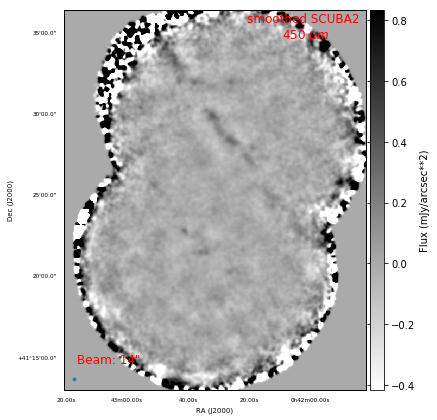

In [23]:
f_450_sm = aplpy.FITSFigure('/Users/shjiao/desktop/check/m31_450um/m31_450_final_sm.fits', figsize=(7,7))
f_450_sm.show_grayscale()
f_450_sm.add_colorbar()
f_450_sm.colorbar.show()
f_450_sm.recenter(10.6303042,41.41090276,width=0.31,height=0.39)
f_450_sm.colorbar.set_location('right')
f_450_sm.colorbar.set_axis_label_text('Flux (mJy/arcsec**2)')
f_450_sm.add_label(0.8,0.95, 'smoothed SCUBA2 \n450 $\mu m$ ', color='red', relative=True, size='large',layer='source')
f_450_sm.show_colorscale(vmin=-30/72.,vmax=60/72.,cmap='gist_yarg',stretch='linear')
f_450_sm.add_beam(major=14.*u.arcsecond,minor=14.*u.arcsecond,angle=0.0)
f_450_sm.add_label(0.15, 0.08, 'Beam: 14\"', relative=True, size='large', layer='title',color='red')
f_450_sm.tick_labels.set_font(size='xx-small')
f_450_sm.axis_labels.set_font(size='x-small')

Using MIRIAD code to combine SCUBA2 450 um image with Herschel data and plot the combined 450 um image.

INFO: Auto-setting vmin to -1.699e-01 [aplpy.core]
INFO: Auto-setting vmax to  1.820e-01 [aplpy.core]


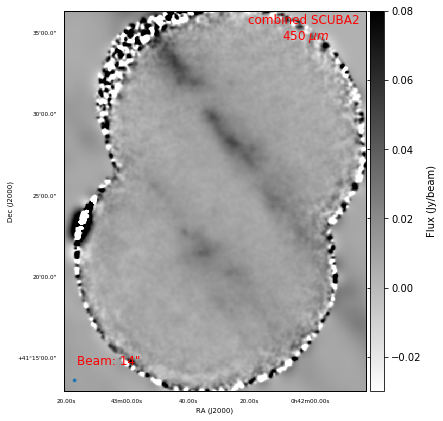

In [36]:
f_450_com = aplpy.FITSFigure('/Users/shjiao/desktop/check/m31_450um/m31combined450.conv.fits', figsize=(7,7))
f_450_com.show_grayscale()
f_450_com.add_colorbar()
f_450_com.colorbar.show()
f_450_com.recenter(10.6303042,41.41090276,width=0.31,height=0.39)
f_450_com.colorbar.set_location('right')
f_450_com.colorbar.set_axis_label_text('Flux (Jy/beam)')
f_450_com.add_label(0.8,0.95, 'combined SCUBA2 \n450 $\mu m$ ', color='red', relative=True, size='large',layer='source')
f_450_com.show_colorscale(vmin=-30/1000.,vmax=80/1000.,cmap='gist_yarg',stretch='linear')
f_450_com.add_beam(major=14.*u.arcsecond,minor=14.*u.arcsecond,angle=0.0)
f_450_com.add_label(0.15, 0.08, 'Beam: 14\"', relative=True, size='large', layer='title',color='red')
f_450_com.tick_labels.set_font(size='xx-small')
f_450_com.axis_labels.set_font(size='x-small')

# 850 um Band

Plot 850 um image, which includes all our 17A and 17B observations.

Using DS9, we could measure a rms noise of ~0.0065 mJy/arcsec**2 from the image center. 
Considering an angule resolution of 14", our 450 um image's rms is ~1.47 mJy/beam.

INFO: Setting slices=[0] [aplpy.core]
INFO: Auto-setting vmin to -5.523e-01 [aplpy.core]
INFO: Auto-setting vmax to  6.017e-01 [aplpy.core]


/Users/shjiao/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/aplpy/normalize.py:115: RuntimeWarning: invalid value encountered in less
  negative = result < 0.


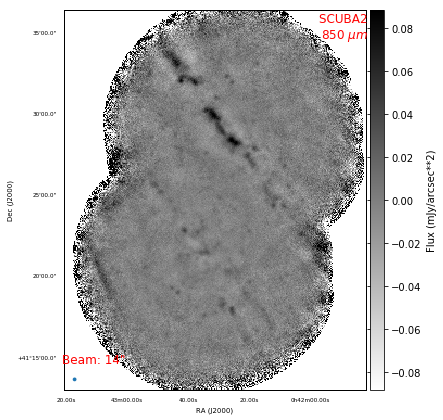

In [13]:
f_850 = aplpy.FITSFigure('/Users/shjiao/desktop/check/m31_450um/m31_850_final.fits', figsize=(7,7))
f_850.show_grayscale()
f_850.add_colorbar()
f_850.colorbar.show()
f_850.recenter(10.6303042,41.41090276,width=0.31,height=0.39)
f_850.colorbar.set_location('right')
f_850.colorbar.set_axis_label_text('Flux (mJy/arcsec**2)')
f_850.add_label(0.93,0.95, 'SCUBA2 \n850 $\mu m$ ', color='red', relative=True, size='large',layer='source')
f_850.show_colorscale(vmin=-0.0886818,vmax=0.0886818,cmap='gist_yarg',stretch='linear')
f_850.add_beam(major=14.*u.arcsecond,minor=14.*u.arcsecond,angle=0.0)
f_850.add_label(0.1, 0.08, 'Beam: 14\"', relative=True, size='large', layer='title',color='red')
f_850.tick_labels.set_font(size='xx-small')
f_850.axis_labels.set_font(size='x-small')
f_850.save('/Users/shjiao/desktop/check/m31_450um/scuba2850.png')

INFO: Setting slices=[0] [aplpy.core]
INFO: Auto-setting vmin to -6.176e-04 [aplpy.core]
INFO: Auto-setting vmax to  6.257e-04 [aplpy.core]


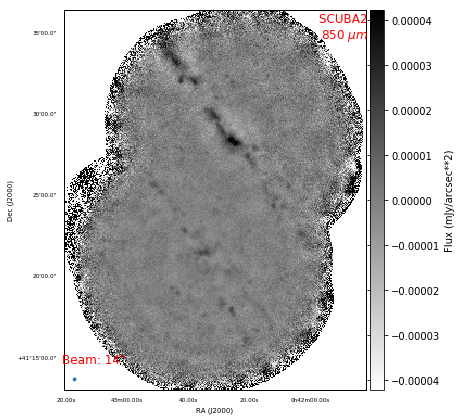

In [3]:
f_850 = aplpy.FITSFigure('/Users/shjiao/desktop/m31_850.fits', figsize=(7,7))
f_850.show_grayscale()
f_850.add_colorbar()
f_850.colorbar.show()
f_850.recenter(10.6303042,41.41090276,width=0.31,height=0.39)
f_850.colorbar.set_location('right')
f_850.colorbar.set_axis_label_text('Flux (mJy/arcsec**2)')
f_850.add_label(0.93,0.95, 'SCUBA2 \n850 $\mu m$ ', color='red', relative=True, size='large',layer='source')
f_850.show_colorscale(vmin=-0.00004218,vmax=0.00004218,cmap='gist_yarg',stretch='linear')
f_850.add_beam(major=14.*u.arcsecond,minor=14.*u.arcsecond,angle=0.0)
f_850.add_label(0.1, 0.08, 'Beam: 14\"', relative=True, size='large', layer='title',color='red')
f_850.tick_labels.set_font(size='xx-small')
f_850.axis_labels.set_font(size='x-small')

Using MIRIAD code to combine SCUBA2 850 um image with Lucy-Richardson deconvolved Planck 353 GHz image and plot the combined 850 um image.

INFO: Auto-setting vmin to -5.145e-02 [aplpy.core]
INFO: Auto-setting vmax to  6.283e-02 [aplpy.core]


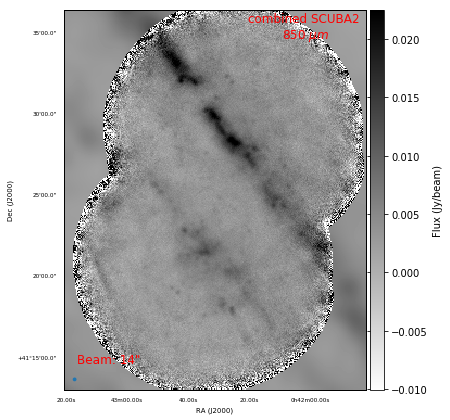

In [12]:
f_850_com = aplpy.FITSFigure('/Users/shjiao/desktop/check/m31_450um/m31_combined850.conv.fits', figsize=(7,7))
f_850_com.show_grayscale()
f_850_com.add_colorbar()
f_850_com.colorbar.show()
f_850_com.recenter(10.6303042,41.41090276,width=0.31,height=0.39)
f_850_com.colorbar.set_location('right')
f_850_com.colorbar.set_axis_label_text('Flux (Jy/beam)')
f_850_com.add_label(0.8,0.95, 'combined SCUBA2 \n850 $\mu m$ ', color='red', relative=True, size='large',layer='source')
f_850_com.show_colorscale(vmin=-0.01011042,vmax=0.0225,cmap='gist_yarg',stretch='linear')
f_850_com.add_beam(major=14.*u.arcsecond,minor=14.*u.arcsecond,angle=0.0)
f_850_com.add_label(0.15, 0.08, 'Beam: 14\"', relative=True, size='large', layer='title',color='red')
f_850_com.tick_labels.set_font(size='xx-small')
f_850_com.axis_labels.set_font(size='x-small')
f_850_com.save('/Users/shjiao/desktop/check/m31_450um/m31_combined850.png')

INFO: Auto-setting vmin to -5.439e+00 [aplpy.core]
INFO: Auto-setting vmax to  8.636e+01 [aplpy.core]
INFO: Auto-setting vmin to -5.439e+00 [aplpy.core]
INFO: Auto-setting vmax to  8.636e+01 [aplpy.core]


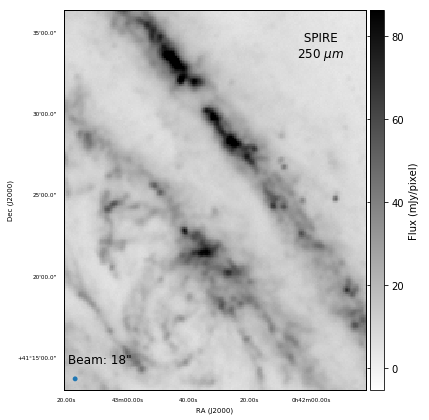

In [14]:
f = aplpy.FITSFigure('/Users/shjiao/desktop/M31/plot/spire250.conv_cutad.fits', figsize=(7,7))
f.show_grayscale()

f.add_colorbar()
f.colorbar.show()

f.recenter(10.6303042,41.41090276,width=0.31,height=0.39)

f.colorbar.set_location('right')
f.colorbar.set_axis_label_text('Flux (mJy/pixel)')
f.add_label(0.85,0.9, ' SPIRE \n250 $\mu m$', color='black', relative=True, size='large',layer='source')
#f.add_label(0.1,0.9, 'Td', color='black', relative=True, size='large',layer='source')
#f.add_label(0.1, 0.9, '(a)', relative=True)
#f.show_colorscale(vmid=0.,vmax=140.,cmap='gist_yarg',stretch='arcsinh')
#f.show_colorscale(cmap='gist_yarg',stretch='arcsinh')
f.show_colorscale(cmap='gist_yarg')
f.add_beam(major=18.*u.arcsecond,minor=18.*u.arcsecond,angle=0.0)
f.add_label(0.12, 0.08, 'Beam: 18\"', relative=True, size='large', layer='title',color='black')
#f.show_contour('spire500.fits')
#f.show_rectangles(10.63, 41.36, 0.07, 0.07)
#f.add_label(0.65, 0.5, 'Region-2', relative=True,color='red')

f.show_circles(10.6, 41.48 , 0.025, layer='100%')
f.show_circles(10.6, 41.48, 0.0875, layer='20%')
#f.add_label(0.65, 0.62, '100%', relative=True,color='blue')

#f.add_label(0.64, 0.73, '20%', relative=True,color='blue')

#f.show_rectangles(10.6, 41.48, 0.07, 0.07)
#f.add_label(0.65, 0.55, 'region-2', relative=True,color='red')

f.tick_labels.set_font(size='xx-small')
f.axis_labels.set_font(size='x-small')
f.save('/Users/shjiao/desktop/check/m31_450um/spire250region2_try.png')